In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [4]:
# 创建一个示例DataFrame
np.random.seed(0)  # 为了结果的可重复性
data = {
    '年龄': np.random.randint(20, 70, size=100),
    '地区': np.random.choice(['北方', '南方', '东方', '西方'], size=100),
    '经济水平': np.random.randint(1, 10, size=100),  # 假设经济水平是1到10的评分
    '医疗保险所占赔偿比例': np.random.uniform(0, 1, size=100)  # 假设为0到1之间的小数
}

df = pd.DataFrame(data)
df.head()

,年龄,地区,经济水平,医疗保险所占赔偿比例
0,64,南方,7,0.881005
1,67,南方,9,0.976404
2,20,西方,1,0.617658
3,23,北方,9,0.542499
4,23,西方,6,0.854614


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [6]:

# 对地区变量进行编码
le = LabelEncoder()
df['地区'] = le.fit_transform(df['地区'])

# 分割数据为特征变量和目标变量
X = df[['年龄', '地区', '经济水平']]  # 特征变量
y = df['医疗保险所占赔偿比例']       # 目标变量

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df.head(), X_train.shape, X_test.shape

(   年龄  地区  经济水平  医疗保险所占赔偿比例
 0  64   2     7    0.881005
 1  67   2     9    0.976404
 2  20   3     1    0.617658
 3  23   1     9    0.542499
 4  23   3     6    0.854614,
 (80, 3),
 (20, 3))

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [13]:
# 假设df是你的DataFrame

# 分离特征和目标变量
X = df[['年龄', '地区', '经济水平']]  # 特征变量
y = df['医疗保险所占赔偿比例']       # 目标变量

# 分割数据为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林模型
model = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)

# 训练模型
model.fit(X_train, y_train)

# 获取特征重要性
feature_importances = model.feature_importances_

# 创建特征重要性的DataFrame
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# 打印特征重要性
print(features_df.sort_values(by='Importance', ascending=False))

y_pred = model.predict(X_test)

# 计算MSE和R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 使用交叉验证评估模型
cross_val_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# 计算OOB误差
oob_error = 1 - model.oob_score_

print(f'MSE: {mse}, R²: {r2}')
print(f'Cross-validated MSE: {np.mean(cross_val_scores)}')
print(f'OOB Error: {oob_error}')


  Feature  Importance
0      年龄    0.526416
2    经济水平    0.241388
1      地区    0.232196
MSE: 0.08277622521681946, R²: -0.36318819933328395
Cross-validated MSE: -0.09429186941933294
OOB Error: 1.427486506812177


In [8]:
import statsmodels.api as sm

In [9]:
X = df[['年龄', '经济水平'] + [col for col in df.columns if col.startswith('地区_')]]
y = df['医疗保险所占赔偿比例']

# 添加常数项，以便模型包含截距
X = sm.add_constant(X)

# 建立模型并拟合数据
model = sm.OLS(y, X).fit()

# 打印模型的摘要
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             医疗保险所占赔偿比例   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.4168
Date:                Tue, 19 Mar 2024   Prob (F-statistic):              0.660
Time:                        19:31:05   Log-Likelihood:                -14.238
No. Observations:                 100   AIC:                             34.48
Df Residuals:                      97   BIC:                             42.29
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5397      0.105      5.123      0.0

In [14]:
from sklearn.preprocessing import StandardScaler

# 只选择数值列进行聚类
data_for_clustering = df[['年龄', '经济水平', '地区']]  # 假设地区已经是数值化处理过的
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

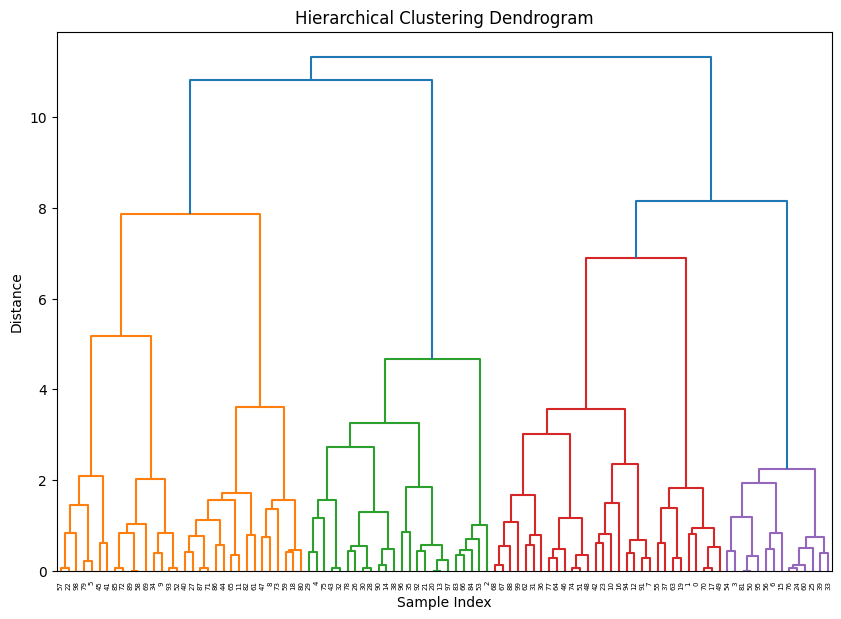

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 使用Ward的方法计算链接矩阵
linked = linkage(data_scaled, method='ward')

# 绘制树状图
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=df.index.tolist(), distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()